## Draw line from ball to last line

In [81]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt 

In [82]:
template = np.full((1080, 1920, 3), (255,255,255), dtype='uint8')

In [83]:
bbox = np.array([1133, 889, 1264, 1019])

In [84]:
p1, p2 = (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3]))

In [85]:
center_x = int((p1[0]+p2[0])/2)
center_y = int((p1[1]+p2[1])/2)

In [86]:
def centre(bbox):
    """bbox is an np array"""
    p1, p2 = (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3]))
    center_x = int((p1[0]+p2[0])/2)
    center_y = int((p1[1]+p2[1])/2)
    return center_x, center_y

In [87]:
cv2.rectangle(template, p1, p2, (0,0,0), thickness=2, lineType=cv2.LINE_AA);
cv2.line(template, (0, 200), (1750, 1000), 255, 2);
cv2.circle(template, (center_x, center_y), radius=2, color=(0,0,0), thickness=2);

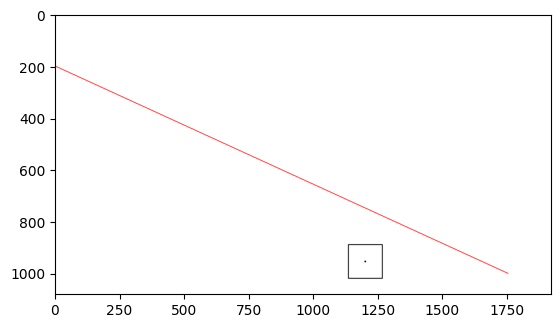

In [88]:
plt.imshow(template)

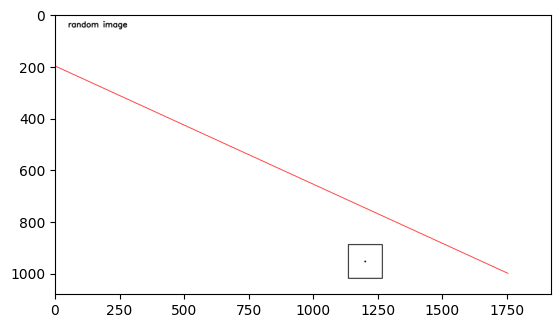

In [94]:
text = "random image"
cv2.putText(template, text, (50,50),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
plt.imshow(template)

In [89]:
def draw_prependicular(l1, l2, p):
    """ 
    draw prependicular line from point to line
    l1, l2 : two points of the line
    p: point
    """
    x1 = l1[0]
    y1 = l1[1]
    x2 = l2[0]
    y2 = l2[1]

    x3 = p[0]
    y3 = p[1]

    # this will be an infinite line
    k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)^2 + (x2-x1)^2)
    x4 = x3 - k * (y2-y1)
    y4 = y3 + k * (x2-x1)

    # intersection point of two lines
    # source: https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
    # line1: (x1,y1) (x2,y2)
    # line2: (x3,y3) (x4,y4)
    intersect_x = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    intersect_y = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    
    cv2.line(template, (x3, y3), (int(intersect_x), int(intersect_y)), (0,0,0), 2)

    return intersect_x, intersect_y 

In [43]:
# draw a prependicular line from center to the line 
# line
x1 = 0
y1 = 200
x2 = 1750
y2 = 1000
# point
x3 = center_x
y3 = center_y

In [44]:
k = ((y2-y1) * (x3-x1) - (x2-x1) * (y3-y1)) / ((y2-y1)^2 + (x2-x1)^2)
x4 = x3 - k * (y2-y1)
y4 = y3 + k * (x2-x1)

In [45]:
# cv2.line(template, (x3, y3), (int(x4), int(y4)), 255, 2);

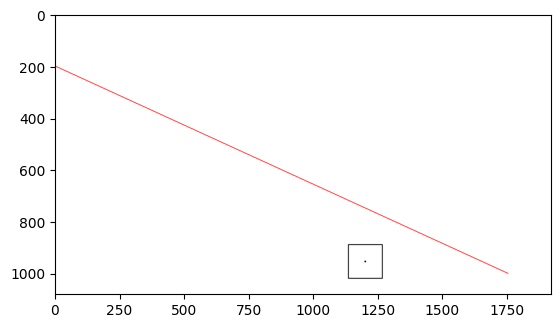

In [46]:
plt.imshow(template)

In [80]:
def line_intersection(p1, p2, p3, p4):
    """ calculate intersection point of two lines
        line1: p1, p2
        line2: p3, p4
    """
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    x3 = p3[0]
    y3 = p3[1]
    x4 = p4[0]
    y4 = p4[1]


    # calculate the intersecting point of two lines  
    # source: https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
    # line1: (x1,y1) (x2,y2)
    # line2: (x3,y3) (x4,y4)
    intersect_x = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    intersect_y = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
    
    return intersect_x, intersect_y

In [47]:
# calculate the intersecting point of two lines  
# source: https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
# line1: (x1,y1) (x2,y2)
# line2: (x3,y3) (x4,y4)
intersect_x = ((x1*y2 - y1*x2)*(x3-x4) - (x1-x2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
intersect_y = ((x1*y2 - y1*x2)*(y3-y4) - (y1-y2)*(x3*y4 - y3*x4))/((x1-x2)*(y3-y4)-(y1-y2)*(x3-x4))
intersect_x, intersect_y

(1276.0229574611749, 783.32478055368)

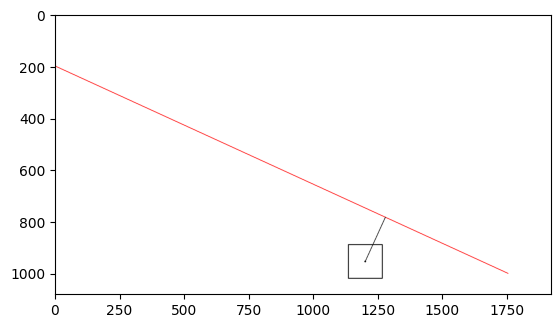

In [48]:
cv2.line(template, (x3, y3), (int(intersect_x), int(intersect_y)), (0,0,0), 2); 
plt.imshow(template)

In [74]:
def ball_vs_line(l1, l2, pt):
    """ calculate on which side of the line the ball is"""
    # line
    x1 = l1[0]
    y1 = l1[1]
    x2 = l2[0]
    y2 = l2[1]

    slope = (y2-y1)/(x2-x1) 
    intercept = -slope*x1 + y1   

    rhs = slope*pt[0]+intercept
    lhs = pt[1]  

    if lhs > rhs:
        return True
    else:
        return False

In [50]:
# calculate on which side of the line a point is?
# y < mx+c or y > mx+c , if y=mx+c then the point is on the line
slope = (y2-y1)/(x2-x1) 
intercept = -slope*x1 + y1 

In [53]:
pt = (750, 800)
rhs = slope*pt[0]+intercept
lhs = pt[1]

In [55]:
lhs > rhs 

True

In [56]:
pt = (1500, 200)
rhs = slope*pt[0]+intercept 
lhs = pt[1]

In [57]:
lhs > rhs

False

In [77]:
def traj_line_intersection(intersect_pt, goal_corners):
    """ calculate whether the trajectory line intersection went through the goal post or not"""
    gp_left = goal_corners[0]
    gp_right = goal_corners[3]

    if intersect_pt[1] > gp_right[1] and intersect_pt[0] > gp_right[0]:
        cross_location = "right"
    elif intersect_pt[1] < gp_left[1] and intersect_pt[0] < gp_left[0]:
        cross_location = "left"
    elif intersect_pt[1] >= gp_left[1] and intersect_pt[1] <= gp_right[1] and intersect_pt[0] <= gp_right[0] and intersect_pt[0] >= gp_left[0]:
        cross_location = "inside"
    
    return cross_location

In [60]:
# calculate whether the ball crossed the line from the side of the court
# take the starting point before crossing the line and end point after crossing the line, find the intersection of trajectory with the line, check if that 
# intersection lies on the line of the goal post
intersect_pt = (intersect_x, intersect_y)
gp_left = (500, slope*500+intercept)
gp_right = (750,slope*750+intercept)

if intersect_pt[1] > gp_right[1] and intersect_pt[0] > gp_right[0]:
    cross_location = "right"
elif intersect_pt[1] < gp_left[1] and intersect_pt[0] < gp_left[0]:
    cross_location = "left"
elif intersect_pt[1] >= gp_left[1] and intersect_pt[1] <= gp_right[1] and intersect_pt[0] <= gp_right[0] and intersect_pt[0] >= gp_left[0]:
    cross_location = "inside"

In [61]:
# calculate whether the ball is inside the court
# calculate wheter the centre point of the ball lies inside the rectangle 
# or, calculate the overlap of the bounding box of the ball with the goalpost
p1

(1133, 889)

In [62]:
p2

(1264, 1019)

In [67]:
w = p2[0] - p1[0]
h = p2[1] - p1[1]
w,h

(131, 130)

In [68]:
p3 = (p1[0]+w, p1[1])
p3

(1264, 889)

In [69]:
p4 = (p1[0], p1[1]+h)
p4

(1133, 1019)

In [63]:
center_x, center_y

(1198, 954)

In [64]:
def area(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

In [66]:
def check(x1, y1, x2, y2, x3,
		y3, x4, y4, x, y):
	
	"""check if the ball is inside the goal post or not"""
	# Calculate area of rectangle ABCD
	A = (area(x1, y1, x2, y2, x3, y3) +
		area(x1, y1, x4, y4, x3, y3))

	# Calculate area of triangle PAB
	A1 = area(x, y, x1, y1, x2, y2)

	# Calculate area of triangle PBC
	A2 = area(x, y, x2, y2, x3, y3)

	# Calculate area of triangle PCD
	A3 = area(x, y, x3, y3, x4, y4)

	# Calculate area of triangle PAD
	A4 = area(x, y, x1, y1, x4, y4)

	# Check if sum of A1, A2, A3
	# and A4 is same as A
	return (A == A1 + A2 + A3 + A4)

In [71]:
check(p1[0], p1[1], p3[0], p3[1], p2[0], p2[1], p4[0], p4[1], center_x, center_y)

True

In [76]:
# case1: ball gets detected inside the goal post, it could be a real or false detection. 
# false detection mean ball is actually not inside the goal post, but it looks like it is.
# if the ball gets detected inside the goalpost, then I will analyze the change in trajectory, 
# if there is a significant change, it will be detected as deflection, else no deflection.

# case 2: ball doesn't get detected inside the goal post, detection was missed or ball never went inside the goal post.
# in this case we will take the intersection point of the ball trajectory with the line and determine if the intersection point lies in the goal post. 

In [78]:
from math import atan

# Function to find the
# angle between two lines
def findAngle(M1, M2):
	PI = 3.14159265
	
	# Store the tan value of the angle
	angle = abs((M2 - M1) / (1 + M1 * M2))

	# Calculate tan inverse of the angle
	ret = atan(angle)

	# Convert the angle from
	# radian to degree
	val = (ret * 180) / PI

	return round(val, 4)

In [79]:
def change_in_trajectory(p1, p2, p3):
    """
    p1: point on one side of the line
    p2: point inside the goal
    p3: point on other side of the line
    """

    m1 = (p2[1] - p1[1]) / (p2[0] - p1[0])
    m2 = (p3[1] - p2[1]) / (p3[0] - p2[0])

    angle = findAngle(m1, m2)

    # for now just returning the angle
    return angle 


In [95]:
line_pts = [-1924, 924, 1988, 95]

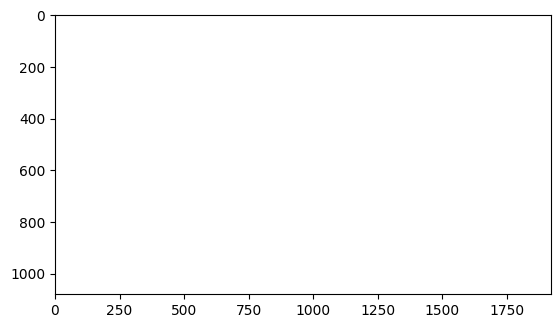

In [98]:
debug_img = np.full((1080, 1920, 3), (255,255,255), dtype='uint8')
cv2.line(template, (line_pts[0], line_pts[1]), (line_pts[2], line_pts[3]), (255,0,0), 2)
plt.imshow(debug_img)

In [6]:
temp = []
try:
    temp.append(decision)
except:
    pass

print("moving on")

moving on


In [2]:
url = "https://km-video-stream.s3.amazonaws.com/shubham/football_clips/miss_1.mp4"
url.split('/')[-1]

'miss_1.mp4'

In [3]:
output = "/home/omno/ammara/shot_detection1/videos/miss/" + url.split('/')[-1]
output

'/home/omno/ammara/shot_detection1/videos/miss/miss_1.mp4'